https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

In [1]:
import pandas as pd 

API KEY 
0cZbnYBjL5gXfK3nQAtaTBhCB

API SECRET KEY 
AwcNDR48iGOc7Uf2eA9h4Dz7nGPlABAp4scMsIQsJrqPzeWFs0

BEARER TOKEN 
AAAAAAAAAAAAAAAAAAAAAPXEMQEAAAAAqYYfNHG7Gsofn7Td8RaINw1QyIU%3DzefvGumyno5WMLwrGRIQJs0S10r2UCYuwk3NJDLN8A790g2PVR



Access token:
1065450120433553410-JM1bl1KXMCZa9yrjw6K2IokKGwQ4GV


Access token secret:
RyO2JjxFOZgf5HWFKo0BQHAQLyCdWspbQjv7MjCPPLzYe

In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tweepy
import csv
import re
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
#import preprocessor as p
import os
import time
from tweepy import OAuthHandler

In [5]:


# consumer_key = 'hheqJPV07LZzIBCVGFEUt2ojI'
# consumer_secret = 'X3x4ausVn0KYLmclg6pAnPp4esnJ532J6z2Sla3QB1yAr37VKl'
# access_key = '1065450120433553410'
# access_secret = '5kCiBBcDGOfwkmORFHD4cVVaNOAujUu29ML087KXsLlTn'

CONSUMER_KEY = 'hheqJPV07LZzIBCVGFEUt2ojI'
CONSUMER_SECRET = 'X3x4ausVn0KYLmclg6pAnPp4esnJ532J6z2Sla3QB1yAr37VKl'
ACCESS_TOKEN = '1065450120433553410-6H5N0JJYAdji06KNE3ozlgJj1zgeOL'
ACCESS_TOKEN_SECRET = '5kCiBBcDGOfwkmORFHD4cVVaNOAujUu29ML087KXsLlTn'

# Pass your twitter credentials to tweepy via its OAuthHandler
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)


In [6]:

# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [7]:

# We will use api as api.search inside this tweepy cursor.

In [8]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [9]:

# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["Oscars"]
get_tweets(Topic , Count=100)

In [10]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-04-27 09:21:34,"Kidzcoolit/Youth #Gottit with Harrison, Con & Bex",False,Kidzcoolit Part 8!!! https://t.co/k9eEVxxvpX T...,0,0,UK
1,2021-04-27 09:21:27,RSS News Hub,False,It List: Sheryl Crow joins HGTV's Ben and Erin...,0,0,"New York, USA"
2,2021-04-27 09:21:10,virginia espinosa,False,"This is so incredibly beautiful \n\nWatch ""Tyl...",0,0,Sydney Australia
3,2021-04-27 09:21:09,!grace,False,Neelofa Neelofa Neelofa iOS 14.5 Ricky Gervais...,0,0,🇲🇾🇲🇾
4,2021-04-27 09:21:08,kee woody,False,Oscars 2021 tortured viewers for more than 3 u...,0,0,"Tulsa, OK"
5,2021-04-27 09:21:08,Stan Matthias,False,"Of course the Oscars was not the same,I think ...",0,0,"London, England"
6,2021-04-27 09:21:07,Mimi,False,@tylerperry I love Madea! Thank you for your ...,0,0,
7,2021-04-27 09:21:06,New York Post,True,Marlee Matlin's sign language snub at Oscars o...,0,0,"New York, NY"


In [11]:

# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [12]:

# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [13]:

#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [14]:

# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2021-04-27 09:21:34,"Kidzcoolit/Youth #Gottit with Harrison, Con & Bex",False,Kidzcoolit Part 8!!! https://t.co/k9eEVxxvpX T...,0,0,UK,kidzcoolit part 8 this and
1,2021-04-27 09:21:27,RSS News Hub,False,It List: Sheryl Crow joins HGTV's Ben and Erin...,0,0,"New York, USA",it list sheryl crow joins hgtv s ben and erin ...
2,2021-04-27 09:21:10,virginia espinosa,False,"This is so incredibly beautiful \n\nWatch ""Tyl...",0,0,Sydney Australia,this is so incredibly beautiful watch tyler pe...
3,2021-04-27 09:21:09,!grace,False,Neelofa Neelofa Neelofa iOS 14.5 Ricky Gervais...,0,0,🇲🇾🇲🇾,neelofa neelofa neelofa ios 14 5 ricky gervais...
4,2021-04-27 09:21:08,kee woody,False,Oscars 2021 tortured viewers for more than 3 u...,0,0,"Tulsa, OK",oscars 2021 tortured viewers for more than 3 u...


In [15]:

# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2021-04-27 09:21:34,"Kidzcoolit/Youth #Gottit with Harrison, Con & Bex",False,Kidzcoolit Part 8!!! https://t.co/k9eEVxxvpX T...,0,0,UK,kidzcoolit part 8 this and,Neutral
1,2021-04-27 09:21:27,RSS News Hub,False,It List: Sheryl Crow joins HGTV's Ben and Erin...,0,0,"New York, USA",it list sheryl crow joins hgtv s ben and erin ...,Neutral
2,2021-04-27 09:21:10,virginia espinosa,False,"This is so incredibly beautiful \n\nWatch ""Tyl...",0,0,Sydney Australia,this is so incredibly beautiful watch tyler pe...,Positive
3,2021-04-27 09:21:09,!grace,False,Neelofa Neelofa Neelofa iOS 14.5 Ricky Gervais...,0,0,🇲🇾🇲🇾,neelofa neelofa neelofa ios 14 5 ricky gervais...,Neutral
4,2021-04-27 09:21:08,kee woody,False,Oscars 2021 tortured viewers for more than 3 u...,0,0,"Tulsa, OK",oscars 2021 tortured viewers for more than 3 u...,Positive


In [16]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 Kidzcoolit Part 7!!! https://t.co/wMTdO1yKSs THIS https://t.co/X1QaBz4FOQ AND https://t.co/PzqqfCurkA… https://t.co/FjyUcOnkPT

Clean tweet:
 kidzcoolit part 7 this and

Sentiment of the tweet:
 Neutral


In [17]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Oscars'] are : 101
Total Positive Tweets are : 44
Total Negative Tweets are : 12
Total Neutral Tweets are : 45


In [18]:
df["Sentiment"].value_counts()

Neutral     45
Positive    44
Negative    12
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Summary of Counts for Total tweets')

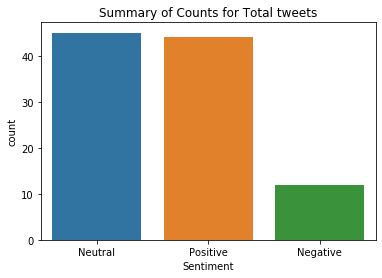

In [19]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

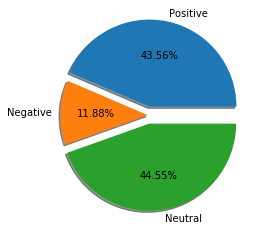

In [20]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

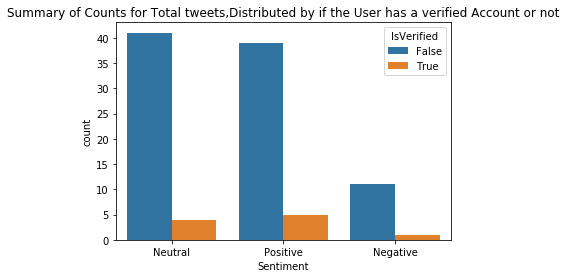

In [21]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

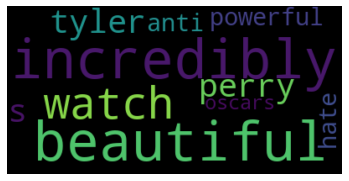

In [23]:
# Start with one review:

text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 8486 words in the combination of all review.


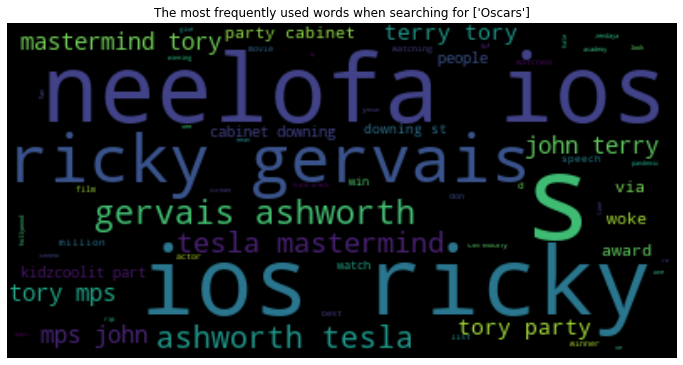

In [24]:

# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

There are 8486 words in the combination of all review.


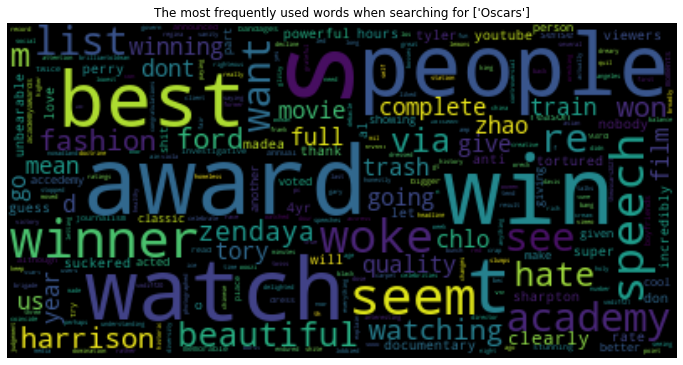

In [25]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

There are 8486 words in the combination of all review.


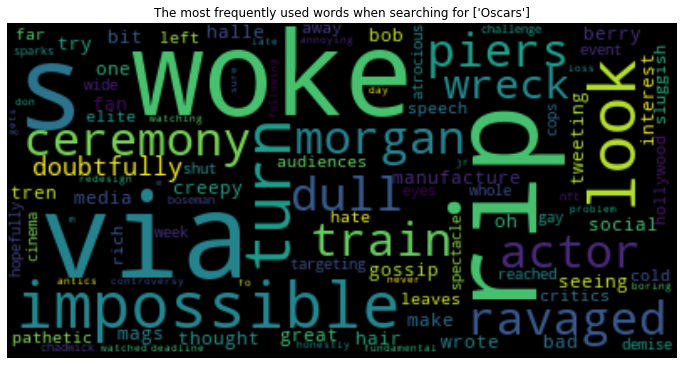

In [26]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

In [27]:
df.to_excel('airags.xls')

In [28]:
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords

# paragraph = """Thank you all so very much. Thank you to the Academy. 
#                Thank you to all of you in this room. I have to congratulate 
#                the other incredible nominees this year. The Revenant was 
#                the product of the tireless efforts of an unbelievable cast
#                and crew. First off, to my brother in this endeavor, Mr. Tom 
#                Hardy. Tom, your talent on screen can only be surpassed by 
#                your friendship off screen … thank you for creating a t
#                ranscendent cinematic experience. Thank you to everybody at 
#                Fox and New Regency … my entire team. I have to thank 
#                everyone from the very onset of my career … To my parents; 
#                none of this would be possible without you. And to my 
#                friends, I love you dearly; you know who you are. And lastly,
#                I just want to say this: Making The Revenant was about
#                man's relationship to the natural world. A world that we
#                collectively felt in 2015 as the hottest year in recorded
#                history. Our production needed to move to the southern
#                tip of this planet just to be able to find snow. Climate
#                change is real, it is happening right now. It is the most
#                urgent threat facing our entire species, and we need to work
#                collectively together and stop procrastinating. We need to
#                support leaders around the world who do not speak for the 
#                big polluters, but who speak for all of humanity, for the
#                indigenous people of the world, for the billions and 
#                billions of underprivileged people out there who would be
#                most affected by this. For our children’s children, and 
#                for those people out there whose voices have been drowned
#                out by the politics of greed. I thank you all for this 
#                amazing award tonight. Let us not take this planet for 
#                granted. I do not take tonight for granted. Thank you so very much."""
               

In [29]:
# sentences = nltk.sent_tokenize(paragraph)
# lemmatizer = WordNetLemmatizer()

# # Lemmatization
# for i in range(len(sentences)):
#     words = nltk.word_tokenize(sentences[i])
#     words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
#     sentences[i] = ' '.join(words)  

In [30]:
# sentences
